# Processamento Linguagem Natural
## Introdução
 
O processamento de linguagem natural não é exatamente um algoritmo de machine learning. De fato, os algoritmos que temos disponíveis trabalham com valores numéricos.
Para usarmos os benefícios de um algoritmo em um cenário muito comum, presença de texto, áudio, vídeo… precisamos primeiro transformar as palavras em features numéricas para então usarmos os algoritmos.
Portanto NLP engloba a transformação de texto em features, bem como a aplicação de algoritmos nessas features geradas.
 
 
#Tokenização
**Bag of words:**
Arquivos de texto são, na verdade, séries de palavras (ordenadas). Para executar algoritmos de aprendizado de máquina, precisamos converter os arquivos de texto em vetores de recursos numéricos. Nós estaremos usando o modelo bag of words para o nosso exemplo. 
 
O modelo bag-of-words é uma representação simplificada usada no processamento de linguagem natural e recuperação de informações (IR). Nesse modelo, um texto (como uma frase ou um documento) é representado como o saco (multiconjunto) de suas palavras, desconsiderando a gramática e até mesmo a ordem das palavras, mas mantendo a multiplicidade.
 
O modelo bag-of-words é comumente usado em métodos de classificação de documentos onde a frequência de ocorrência de cada palavra é usada como uma  feature para treinar um classificador.
 
Resumidamente, segmentamos cada arquivo de texto em palavras (usando espaço como divisão), contamos o número de vezes que cada palavra ocorre em cada documento e, finalmente, atribuímos a cada palavra um id inteiro. Cada palavra única em nosso dicionário corresponderá a uma feature (descriptive feature).
 
Problemas:
- Ignora o contexto em que as palavras aparecem
- Negação é um problema
 
**N-Gramas:**
O número N define o número de palavras que vão compor a feature, se n = 1 então temos um bag of words, se n = 2 temos duas palavras por feature e assim por diante, isso ajuda a manter o contexto.
 
- Aumenta a quantidade de tokens rapidamente
- O contexto adicionado ao concatenar os tempos é limitado e local
 
**Sentence Tokenize:**
Uma frase inteira é uma feature. Essa estratégia é boa quando poucas sentenças descrevem o texto completo. Ex: Resumo de artigos científicos.
 
#Limpeza
**Remoção de Stop Words:**
A remoção de stopwords retira tokens que não carregam informação útil
para caracterizar o documento, que geralmente são utilizadas apenas para a construção estrutural da frase, não dão o sentido dela. Exemplo: para, a, o, que, da.
 
**Padronização:** Palavras com o mesmo significado, escritas de forma diferente ou com erros de ortografia podem ser um problema ao serem transformadas em features, por isso padronizar esse tipo de ocorrência é importante.
 
**Normalização Lexical:** O processo de normalização lexical de lematização consiste em reduzir uma palavra ao seu radical ou ao seu lema. Ex:
gat: gat, gata, gatos, gatas; verbos somente no infinitivo. Problema mais recorrente em línguas latinas.
 
#Vetorização
A metodologia de vetorização dá o valor do token para um documento. É
uma medida de grandeza associada ao token
 
**Binária:** Se o token está ou não presente no texto.
 
**Frequência do Termo (TF):** Quantas vezes o token aparece no texto.
 
**TF*IDF:** Estabelece uma ponderação aos tokens presentes em um
documento ao relacionar com o corpus (todos os textos indexados). Tokens que aparecem muito no corpus tem relevância baixa, tokens que aparecem pouco tem maior relevância.
 
 
#Nosso exemplo
Vamos usar bag of words no nosso exemplo
Contar apenas o número de palavras em cada documento tem um problema: dará mais peso a documentos mais longos do que a documentos mais curtos. Para evitar isso, podemos usar a frequência (TF - Term Frequencies), ou seja,
 
**contagem de palavras / total de palavras**
 
em cada documento.
 
TF-IDF: Finalmente, podemos até reduzir o peso das palavras mais comuns entre os documentos como (the, is, an etc.) que ocorrem em todos os documentos. Isso é chamado de TF-IDF, ou seja, frequência de termo vezes frequência de documento inversa.
 
Para esse processo vamos utilizar o Naive Bytes para fazer a predição.



# Exemplo 
Esse exemplo utiliza o conjunto de dados 20newsgroups.

Esse dataset compreende cerca de 18.000 postagens de noticias


## Fornecimento dos dados para o classificador

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', shuffle=True, remove=('headers', 'footers', 'quotes'))
print("\n".join(twenty_train.target_names))

text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
])

text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicao = text_clf.predict(twenty_test.data)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


## Matriz de confusão

Visualizando a distribuição de classificações de acordo com as classes

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      0.27      0.41       319
           1       0.68      0.80      0.74       389
           2       0.74      0.72      0.73       394
           3       0.66      0.76      0.71       392
           4       0.89      0.68      0.77       385
           5       0.77      0.78      0.77       395
           6       0.80      0.86      0.83       390
           7       0.92      0.82      0.87       396
           8       0.97      0.88      0.92       398
           9       0.97      0.89      0.93       397
          10       0.91      0.97      0.94       399
          11       0.64      0.96      0.76       396
          12       0.75      0.62      0.68       393
          13       0.92      0.80      0.86       396
          14       0.79      0.90      0.84       394
          15       0.45      0.97      0.62       398
          16       0.65      0.86      0.74       364
          17       0.90    

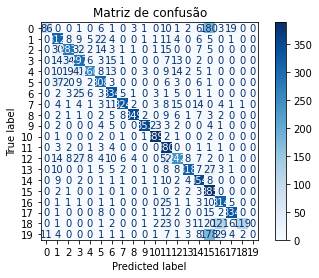

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print(classification_report(twenty_test.target, predicao))

matriz_confusao = ConfusionMatrixDisplay.from_estimator(
    text_clf,
    twenty_test.data,
    twenty_test.target,
    cmap=plt.cm.Blues,
    normalize=None,
)
matriz_confusao.ax_.set_title('Matriz de confusão')

plt.show()

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', shuffle=True, remove=('headers', 'footers', 'quotes'))
print("\n".join(twenty_train.target_names))

text_clf_rf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                      ('clf', RandomForestClassifier(random_state=1)),
])

text_clf_rf = text_clf_rf.fit(twenty_train.data, twenty_train.target)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicao = text_clf_rf.predict(twenty_test.data)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


              precision    recall  f1-score   support

           0       0.62      0.50      0.55       319
           1       0.68      0.66      0.67       389
           2       0.63      0.80      0.71       394
           3       0.67      0.68      0.67       392
           4       0.74      0.75      0.74       385
           5       0.71      0.74      0.72       395
           6       0.75      0.86      0.80       390
           7       0.84      0.75      0.79       396
           8       0.82      0.90      0.86       398
           9       0.89      0.87      0.88       397
          10       0.87      0.95      0.91       399
          11       0.82      0.87      0.85       396
          12       0.61      0.53      0.57       393
          13       0.85      0.72      0.78       396
          14       0.75      0.84      0.79       394
          15       0.56      0.87      0.68       398
          16       0.62      0.77      0.69       364
          17       0.90    

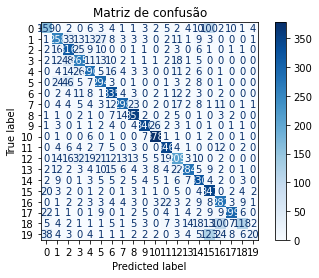

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print(classification_report(twenty_test.target, predicao))

matriz_confusao = ConfusionMatrixDisplay.from_estimator(
    text_clf_rf,
    twenty_test.data,
    twenty_test.target,
    cmap=plt.cm.Blues,
    normalize=None,
)
matriz_confusao.ax_.set_title('Matriz de confusão')

plt.show()

# Fontes bibliográficas

[1] Machine Learning, NLP: Text Classification using scikit-learn, python and NLTK. Disponível em: https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

[2] Introdução ao Processamento de Linguagem
Natural usando Python. Disponível em: https://www.facom.ufu.br/~wendelmelo/terceiros/tutorial_nltk.pdf

